<a href="https://colab.research.google.com/github/ChiyunNoh/ClothClassification/blob/main/cloth_classification_modified1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
train_images.shape ##28*28 픽셀의 이미지가 6만개 있음

(60000, 28, 28, 1)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28, 1)

In [9]:
len(test_labels)

10000

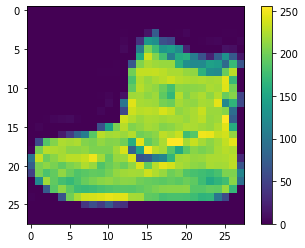

In [10]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.gca().grid(False)

In [11]:
train_images=train_images/255.0
test_images=test_images/255.0
##각 픽셀은 0~255 사이 숫자를 가지므로 0~1사이로 바꿔줌

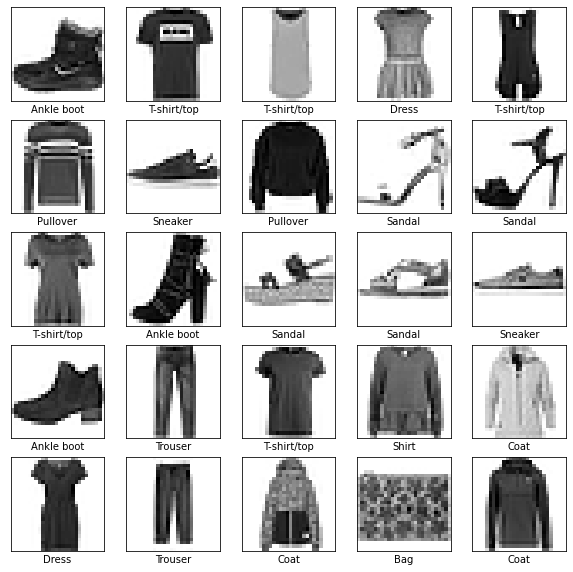

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
##notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) # subplot 여러개의 그래프를 하나의 그래프안에 그릴 수 있게 해줌
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i].reshape(28,28),cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

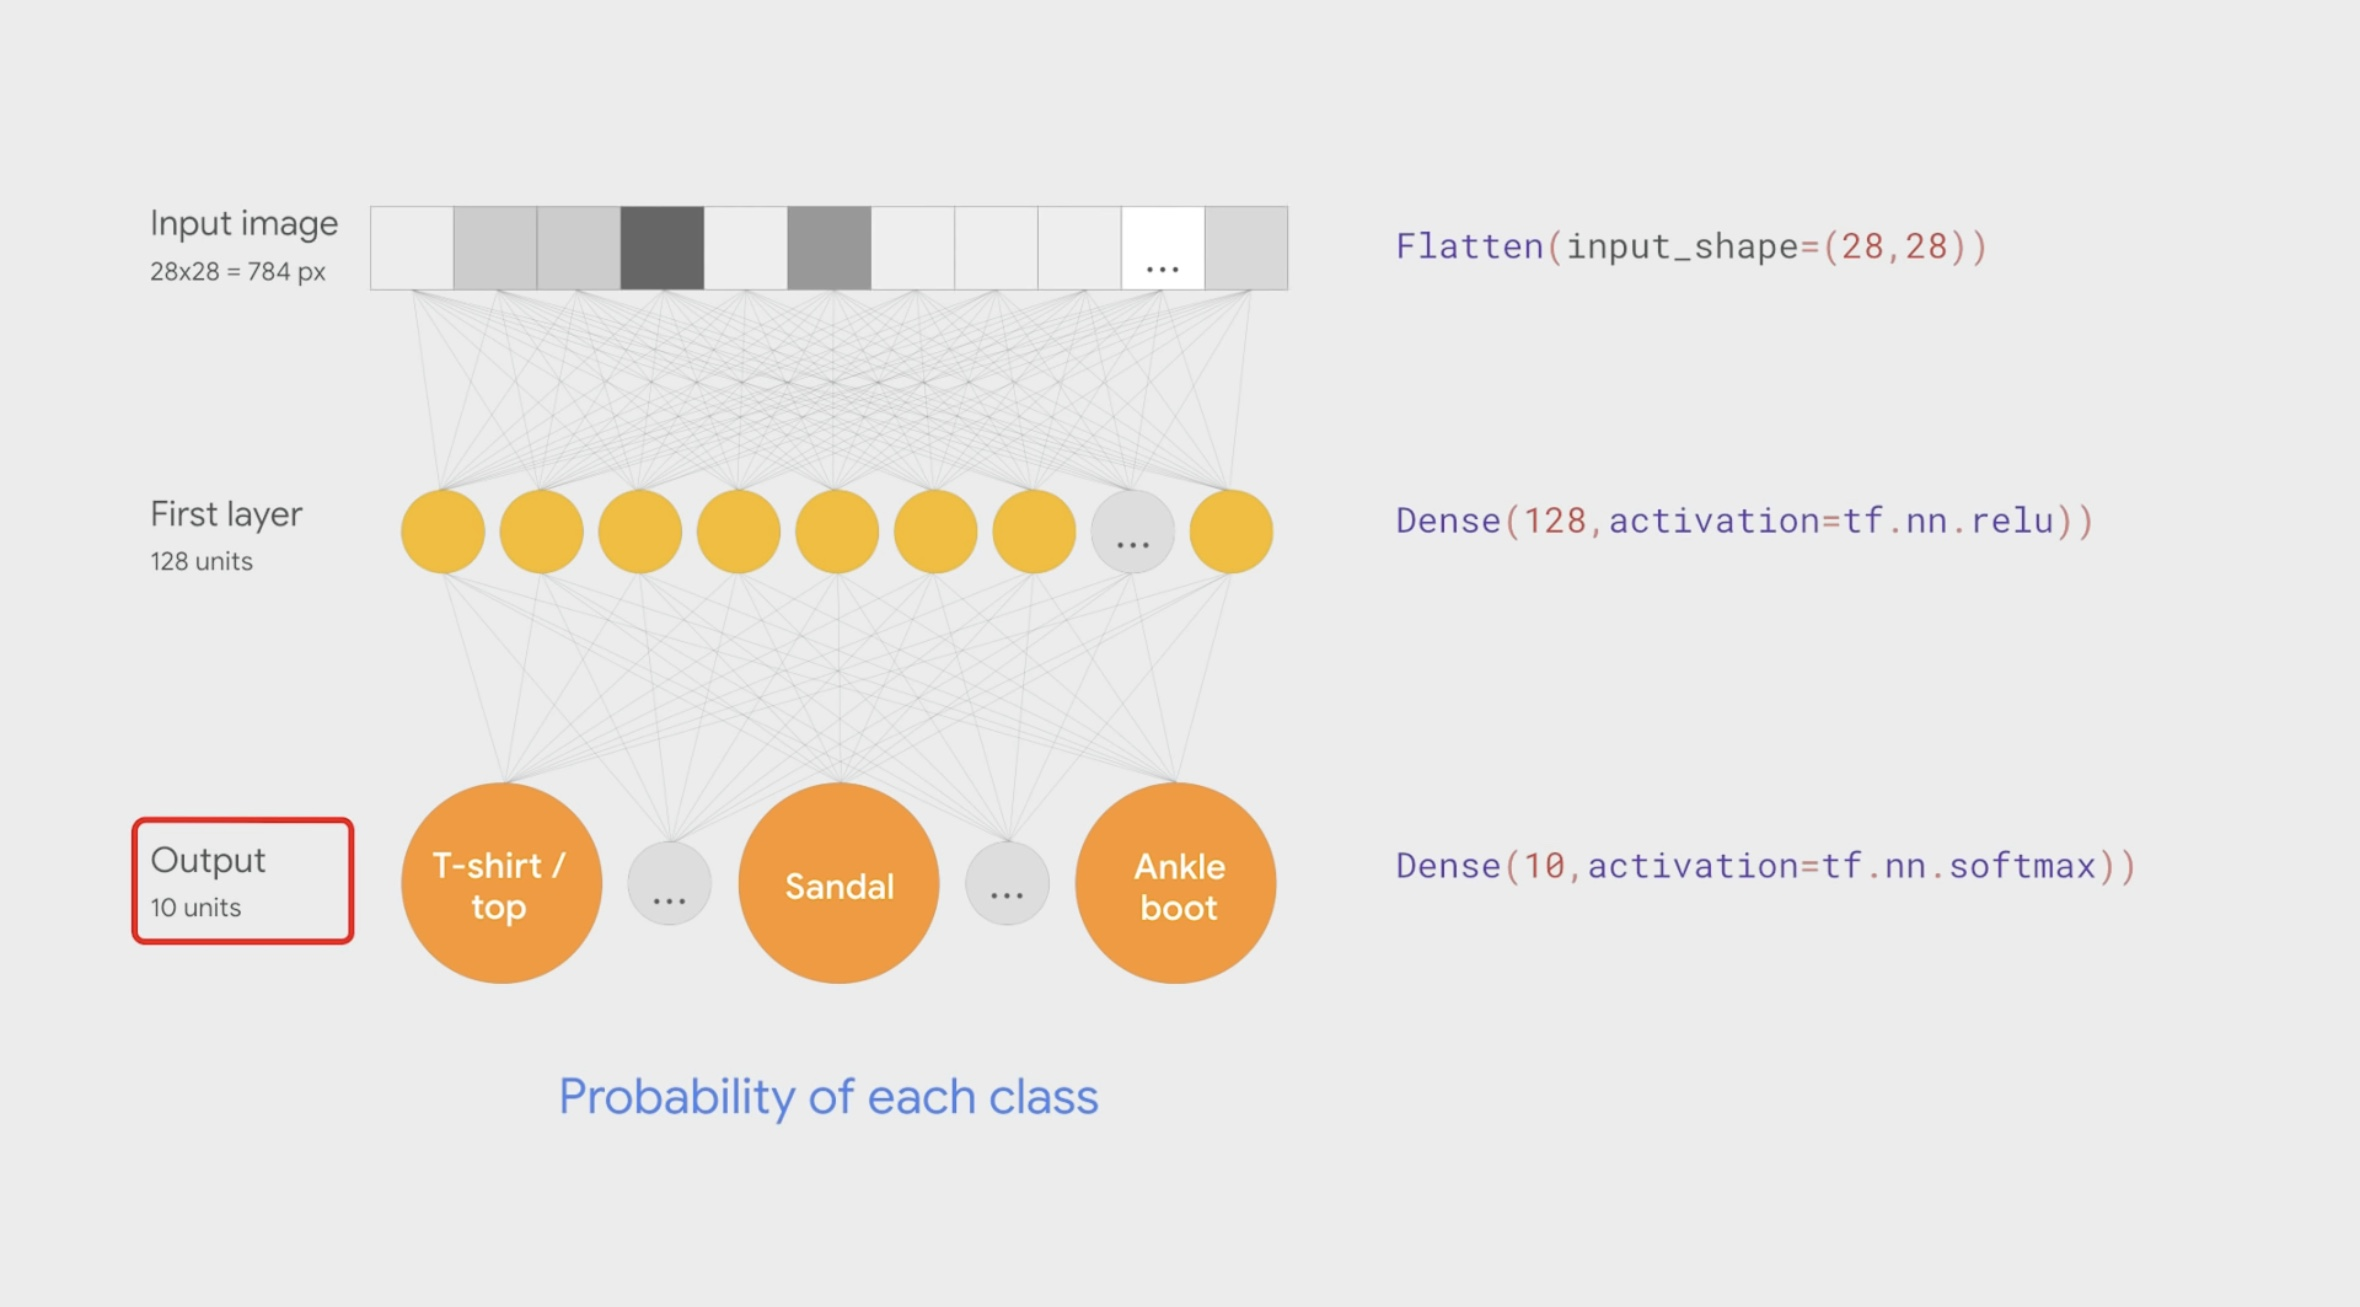

In [14]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)
##fit 함수는 모델 학습시에 사용하는 함수

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4970 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8925


In [16]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8774
Test accuracy: 0.8773999810218811


**Make Predictions**
with the model trained, we can use it to make predictions about some images.

In [17]:
predictions=model.predict(test_images)

In [18]:
predictions[0]
##각 클래스 별 확률 도출

array([2.7237747e-06, 2.4787826e-07, 2.7307556e-06, 7.6225497e-09,
       1.5821827e-07, 5.6721726e-03, 1.0356499e-06, 6.4585216e-02,
       2.7573092e-06, 9.2973292e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

위의 결과 prediction이 맞았음을 알수 있음.

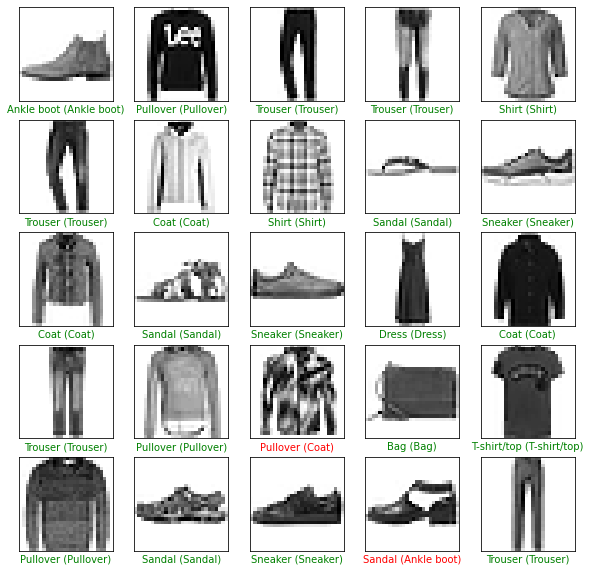

In [21]:
#plot the first 25 test images, their predicted label, and the true label
#color correct predictions as green, and incorrect predictions as red

plt.figure(figsize=(10,10))
#figsize 에 입력되는 값들은 사진의 인치 크기 의미
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions[i])
  true_label=test_labels[i]
  if predicted_label==true_label:
    color='green'
  else:
    color='red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
             color=color)

In [22]:
#Grab an images from the test dataset
img=test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
#Add the image to a batch where it's the only member.
img=(np.expand_dims(img,0))
#np.expand_dims(배열, 축)을 통해 지정된 축의 차원을 확장할 수 있습니다.
print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions=model.predict(img)
print(predictions)

[[2.7237797e-06 2.4787869e-07 2.7307631e-06 7.6225772e-09 1.5821854e-07
  5.6721852e-03 1.0356517e-06 6.4585313e-02 2.7573142e-06 9.2973280e-01]]


In [25]:
predictions=predictions[0]
np.argmax(predictions)

9

In [26]:
import cv2
from google.colab.patches import cv2_imshow

(570, 570)
(28, 28)


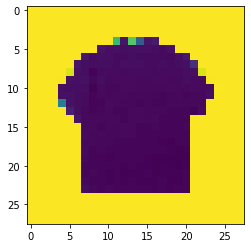

In [45]:
im = cv2.imread("/content/example.jpg",cv2.IMREAD_GRAYSCALE) ##rgb 사진을 grayscale로 바꿔줌
print(im.shape)
im = cv2.resize(im, (28, 28))
print(im.shape)
plt.figure()
plt.imshow(im)
img=(np.expand_dims(im,0))

In [44]:
predictions=model.predict(img)
print(class_names[np.argmax(predictions)])

Bag
